In [1]:
import time
import torch
from torchvision import transforms as T
from tqdm import tqdm
from tempo3.data.datasets import video_dataset, video_dataset_h5
from tempo3.data.pdfs import pdf_index
from tqdm import tqdm

import os
import h5py
from PIL import Image
import matplotlib.pyplot as plt

/home/yasin/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [2]:
pdf_f = pdf_index["uniform"]

In [3]:
start = time.time()

for epoch in tqdm(range(10)):
    for image, image_d, _, _ in video_dataset(proximity=15, batch_size=200, pdf=pdf_f):
        pass

end = time.time()
print(f"Data time: {end-start}s")

100%|██████████| 10/10 [00:42<00:00,  4.22s/it]

Data time: 42.20784091949463s


In [6]:
start = time.time()

for epoch in tqdm(range(10)):
    for image, image_d, _, _ in video_dataset_h5(proximity=15, batch_size=200, pdf=pdf_f, num_workers=8):
        pass

end = time.time()
print(f"Data time: {end-start}s")

100%|██████████| 10/10 [00:06<00:00,  1.44it/s]

Data time: 6.944677114486694s


################################################

In [4]:
names = sorted(list(os.listdir("datasets/ASL-big/frames/")))
images = [Image.open(f"datasets/ASL-big/frames/{name}", mode="r")for name in names]

In [5]:
transform = T.Compose([
    T.Resize(128),
    T.ToTensor(),
    T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [6]:
f = h5py.File("frames.hdf5", "w")

In [7]:
images_t = [transform(i) for i in images]
images_t = torch.stack(images_t)
images_t.shape

torch.Size([3757, 3, 128, 128])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


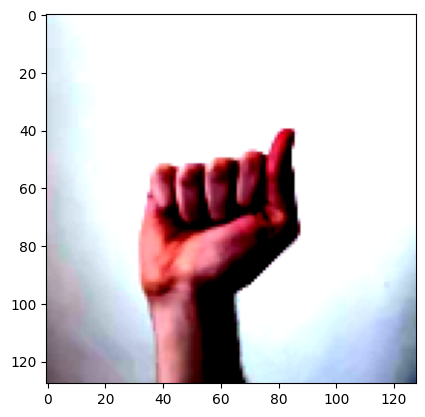

In [8]:
plt.imshow(images_t[0].permute(1,2,0))

In [9]:
dset = f.create_dataset(
    "frames",
    tuple(images_t.shape),
    data=images_t,
    dtype='f'
)

In [10]:
dset.name

'/frames'

In [11]:
f.keys()

<KeysViewHDF5 ['frames']>

In [12]:
f["frames"][0].shape

(3, 128, 128)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


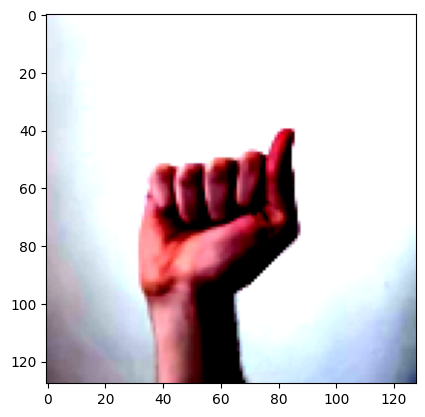

In [13]:
plt.imshow(f["frames"][1].transpose(1,2,0))

In [14]:
f.close()

In [15]:
f = h5py.File('frames.hdf5', 'r')

In [16]:
f.keys()

<KeysViewHDF5 ['frames']>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


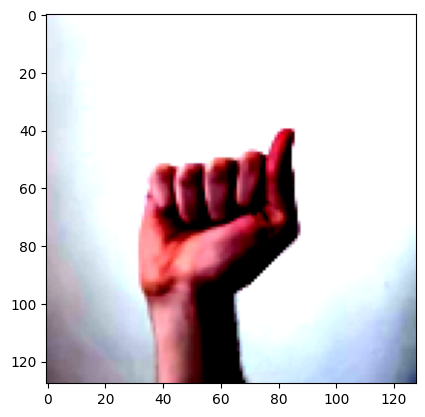

In [17]:
plt.imshow(f["frames"][1].transpose(1,2,0))

In [19]:
len(f["frames"])

3757